### Zomato Restaurant Data Analysis

### Import Modules

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [124]:
data = pd.read_csv('zomato.csv')

In [125]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Getting data info

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [127]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Cleaning data

In [128]:
#Removing unnecessary data such as url, address and phone columns from data
del data['url']
del data['address']
del data['phone']

In [129]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [130]:
#Replacing restaurants with their ratings given as New to NAN and dropping them
data['rate'] = data['rate'].replace('NEW',np.nan)
data['rate'] = data['rate'].replace('-',np.nan)
data.dropna(how='any', inplace=True)

In [131]:
 data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [132]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [133]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)

In [134]:
data['rate'] = data['rate'].astype(str)

In [135]:
data['rate'] = data['rate'].apply(lambda x: x.replace('/5',''))

In [136]:
data['rate'] = data['rate'].apply(lambda x: float(x))

In [137]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [138]:
#Conversion of Cost from String to Integer
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [139]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Restaurants based on their Online Delivery

In [140]:
data['online_order'].value_counts()

Yes    16387
No      6872
Name: online_order, dtype: int64

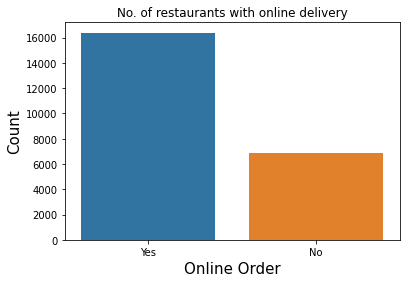

In [141]:
sns.countplot(x = data['online_order'])
plt.xlabel('Online Order', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('No. of restaurants with online delivery')
plt.show()

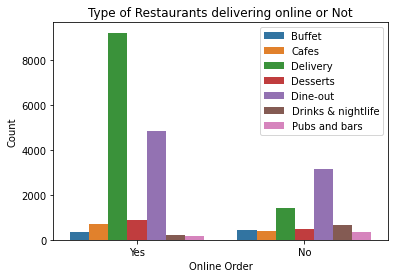

In [142]:
sns.countplot(x=data['online_order'], hue=data['listed_in(type)'])
plt.title('Type of Restaurants delivering online or Not')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.legend()
plt.show()

### Restaurants based on their Table booking facility

In [143]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [144]:
data['book_table'].value_counts()

No     17198
Yes     6061
Name: book_table, dtype: int64

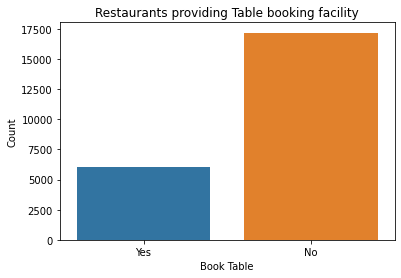

In [145]:
sns.countplot(x=data['book_table'])
plt.title('Restaurants providing Table booking facility')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()

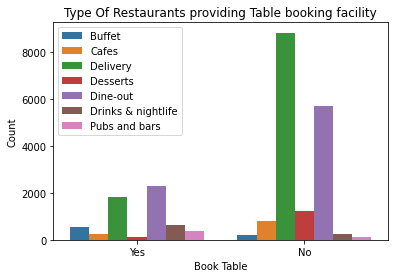

In [146]:
sns.countplot(x=data['book_table'], hue=data['listed_in(type)'])
plt.title('Type Of Restaurants providing Table booking facility')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.legend()
plt.show()

### Restaurants based on their Ratings

In [147]:
data['rate'].max()

4.9

In [148]:
data['rate'].min()

1.8

In [149]:
data['rate'].mean()

3.9058343007008034

In [150]:
data['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [151]:
# no. of restaurants between 1.5 and 2 rating
((data['rate'] >= 1.5) & (data['rate'] <= 2)).sum()

16

In [152]:
data[(data['rate'] >= 1.5) & (data['rate'] <= 2)]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5963,Fusion Lounge,No,No,2.0,395,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500,"[('Rated 3.0', 'RATED\n Heard so many story b...",[],Dine-out,Brigade Road
6300,Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200,"[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Brigade Road
6598,Fusion Lounge,No,No,2.0,395,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500,"[('Rated 3.0', 'RATED\n Heard so many story b...",[],Drinks & nightlife,Brigade Road
12540,Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200,"[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Church Street
12699,Fusion Lounge,No,No,2.0,396,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500,"[('Rated 3.0', 'RATED\n Heard so many story b...",[],Dine-out,Church Street
13259,Fusion Lounge,No,No,2.0,396,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500,"[('Rated 3.0', 'RATED\n Heard so many story b...",[],Drinks & nightlife,Church Street
38751,Fusion Lounge,No,No,2.0,397,Brigade Road,Lounge,"Dance Floor, Dj",Finger Food,1500,"[('Rated 3.0', 'RATED\n Heard so many story b...",[],Dine-out,Lavelle Road
38870,Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,Dj,"North Indian, Continental, Chinese",1200,"[('Rated 1.0', 'RATED\n DO NOT GO HERE! Cheap...",[],Dine-out,Lavelle Road
40698,Bhagini,No,No,2.0,259,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 3.0', ""RATED\n Food is good,,, ambie...",[],Delivery,Marathahalli
41592,Bhagini,No,No,2.0,259,Marathahalli,Casual Dining,"Naan, Pot Biryani, Chicken Guntur, Paneer Tikk...","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 3.0', ""RATED\n Food is good,,, ambie...",[],Dine-out,Marathahalli


In [153]:
# no. of restaurants between 2 and 2.5 rating
((data['rate'] >= 2) & (data['rate'] <= 2.5)).sum()

217

In [154]:
# no. of restaurants between 2.5 and 3 rating
((data['rate'] >= 2.5) & (data['rate'] <= 3)).sum()

1310

In [155]:
data[(data['rate'] >= 2.5) & (data['rate'] <= 3)]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
20,The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
94,Nandhini Deluxe,No,No,2.6,283,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari
146,Darbar,No,No,3.0,98,Banashankari,Bar,"Paneer Tikka, Dal Kichadi, French Fries","North Indian, Chinese",800,"[('Rated 3.0', 'RATED\n I visit this place mo...",[],Delivery,Banashankari
176,Tandoori Knight,Yes,No,3.0,290,Banashankari,Quick Bites,"Chicken Grill, Biryani, Roti, Chicken Masala","North Indian, Chinese, Biryani, Kebab",450,"[('Rated 3.0', ""RATED\n It's a small place.. ...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51611,Chung Wah,No,No,2.5,73,"ITPL Main Road, Whitefield",Casual Dining,Manchow Soup,"Chinese, Momos",800,"[('Rated 1.0', 'RATED\n Food is not everythin...",[],Dine-out,Whitefield
51612,Shaan-E-Punjab,Yes,No,2.9,84,"ITPL Main Road, Whitefield",Casual Dining,"Butter Chicken, Chicken Tikka Masala, Paneer T...",North Indian,500,"[('Rated 3.0', 'RATED\n Pretty average place ...","['Palak Paneer Combo', 'Chicken Tikka Combo', ...",Dine-out,Whitefield
51677,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Drinks & nightlife,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield


In [156]:
# no. of restaurants between 3.0 and 3.5 rating
((data.rate>=3.0) & (data.rate<3.5)).sum()

1418

In [157]:
# no. of restaurants between 3.5 and 4 rating
((data.rate>=3.5) & (data.rate<4)).sum()

8740

In [158]:
# no. of restaurants between 4 and 4.5 rating
((data.rate>=4) & (data.rate<4.5)).sum()

10681

In [159]:
# no. of restaurants between 4.5 and 5 rating
((data.rate>=4.5) & (data.rate<5)).sum()

1236

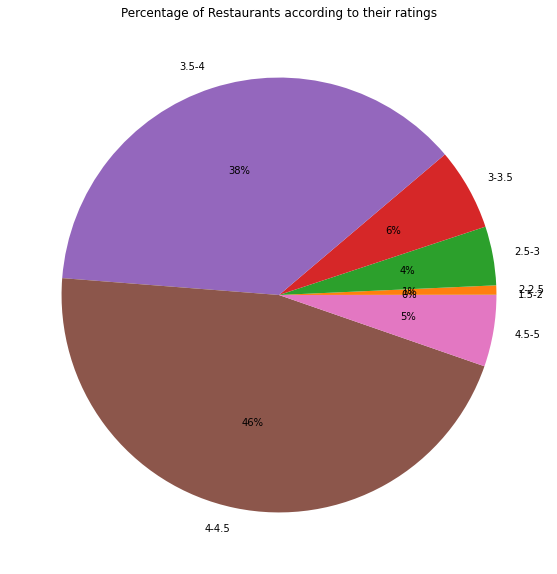

In [160]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
plt.figure(figsize=(20,10))
plt.pie(slices,labels=labels, autopct='%1.0f%%')
plt.title("Percentage of Restaurants according to their ratings")
plt.show()

### Restaurants based on their online order and how rating is related to it

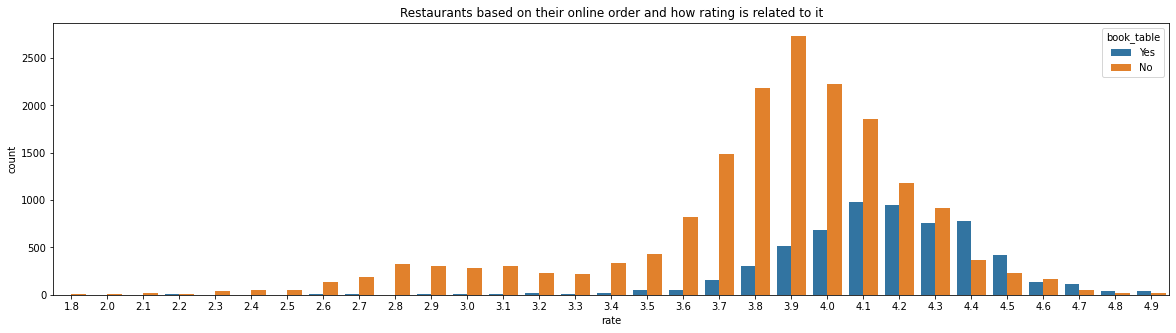

In [161]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['rate'], hue=data['book_table'])
plt.title('Restaurants based on their online order and how rating is related to it')
plt.show()

### Restaurants based on their online order and how rating is related to it

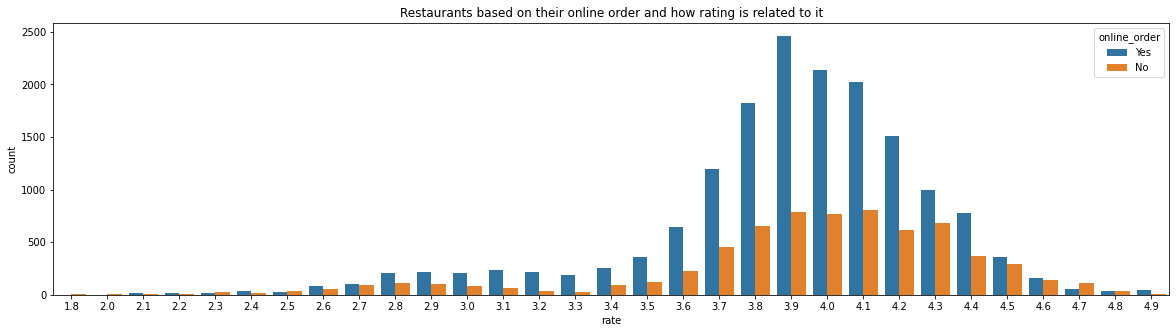

In [162]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['rate'], hue=data['online_order'])
plt.title('Restaurants based on their online order and how rating is related to it')
plt.show()

### Restaurants based on their Location

In [163]:
location_count = data['location'].value_counts().sort_values(ascending=True)
location_count

KR Puram                    1
Magadi Road                 2
Yelahanka                   2
Rajarajeshwari Nagar        2
West Bangalore              2
                         ... 
Jayanagar                1060
HSR                      1170
Indiranagar              1355
BTM                      1474
Koramangala 5th Block    1776
Name: location, Length: 88, dtype: int64

In [164]:
location_count.max()

1776

In [165]:
location_count[location_count == 1776]

Koramangala 5th Block    1776
Name: location, dtype: int64

In [166]:
location_count.min()

1

In [167]:
location_count[location_count == 1]

KR Puram    1
Name: location, dtype: int64

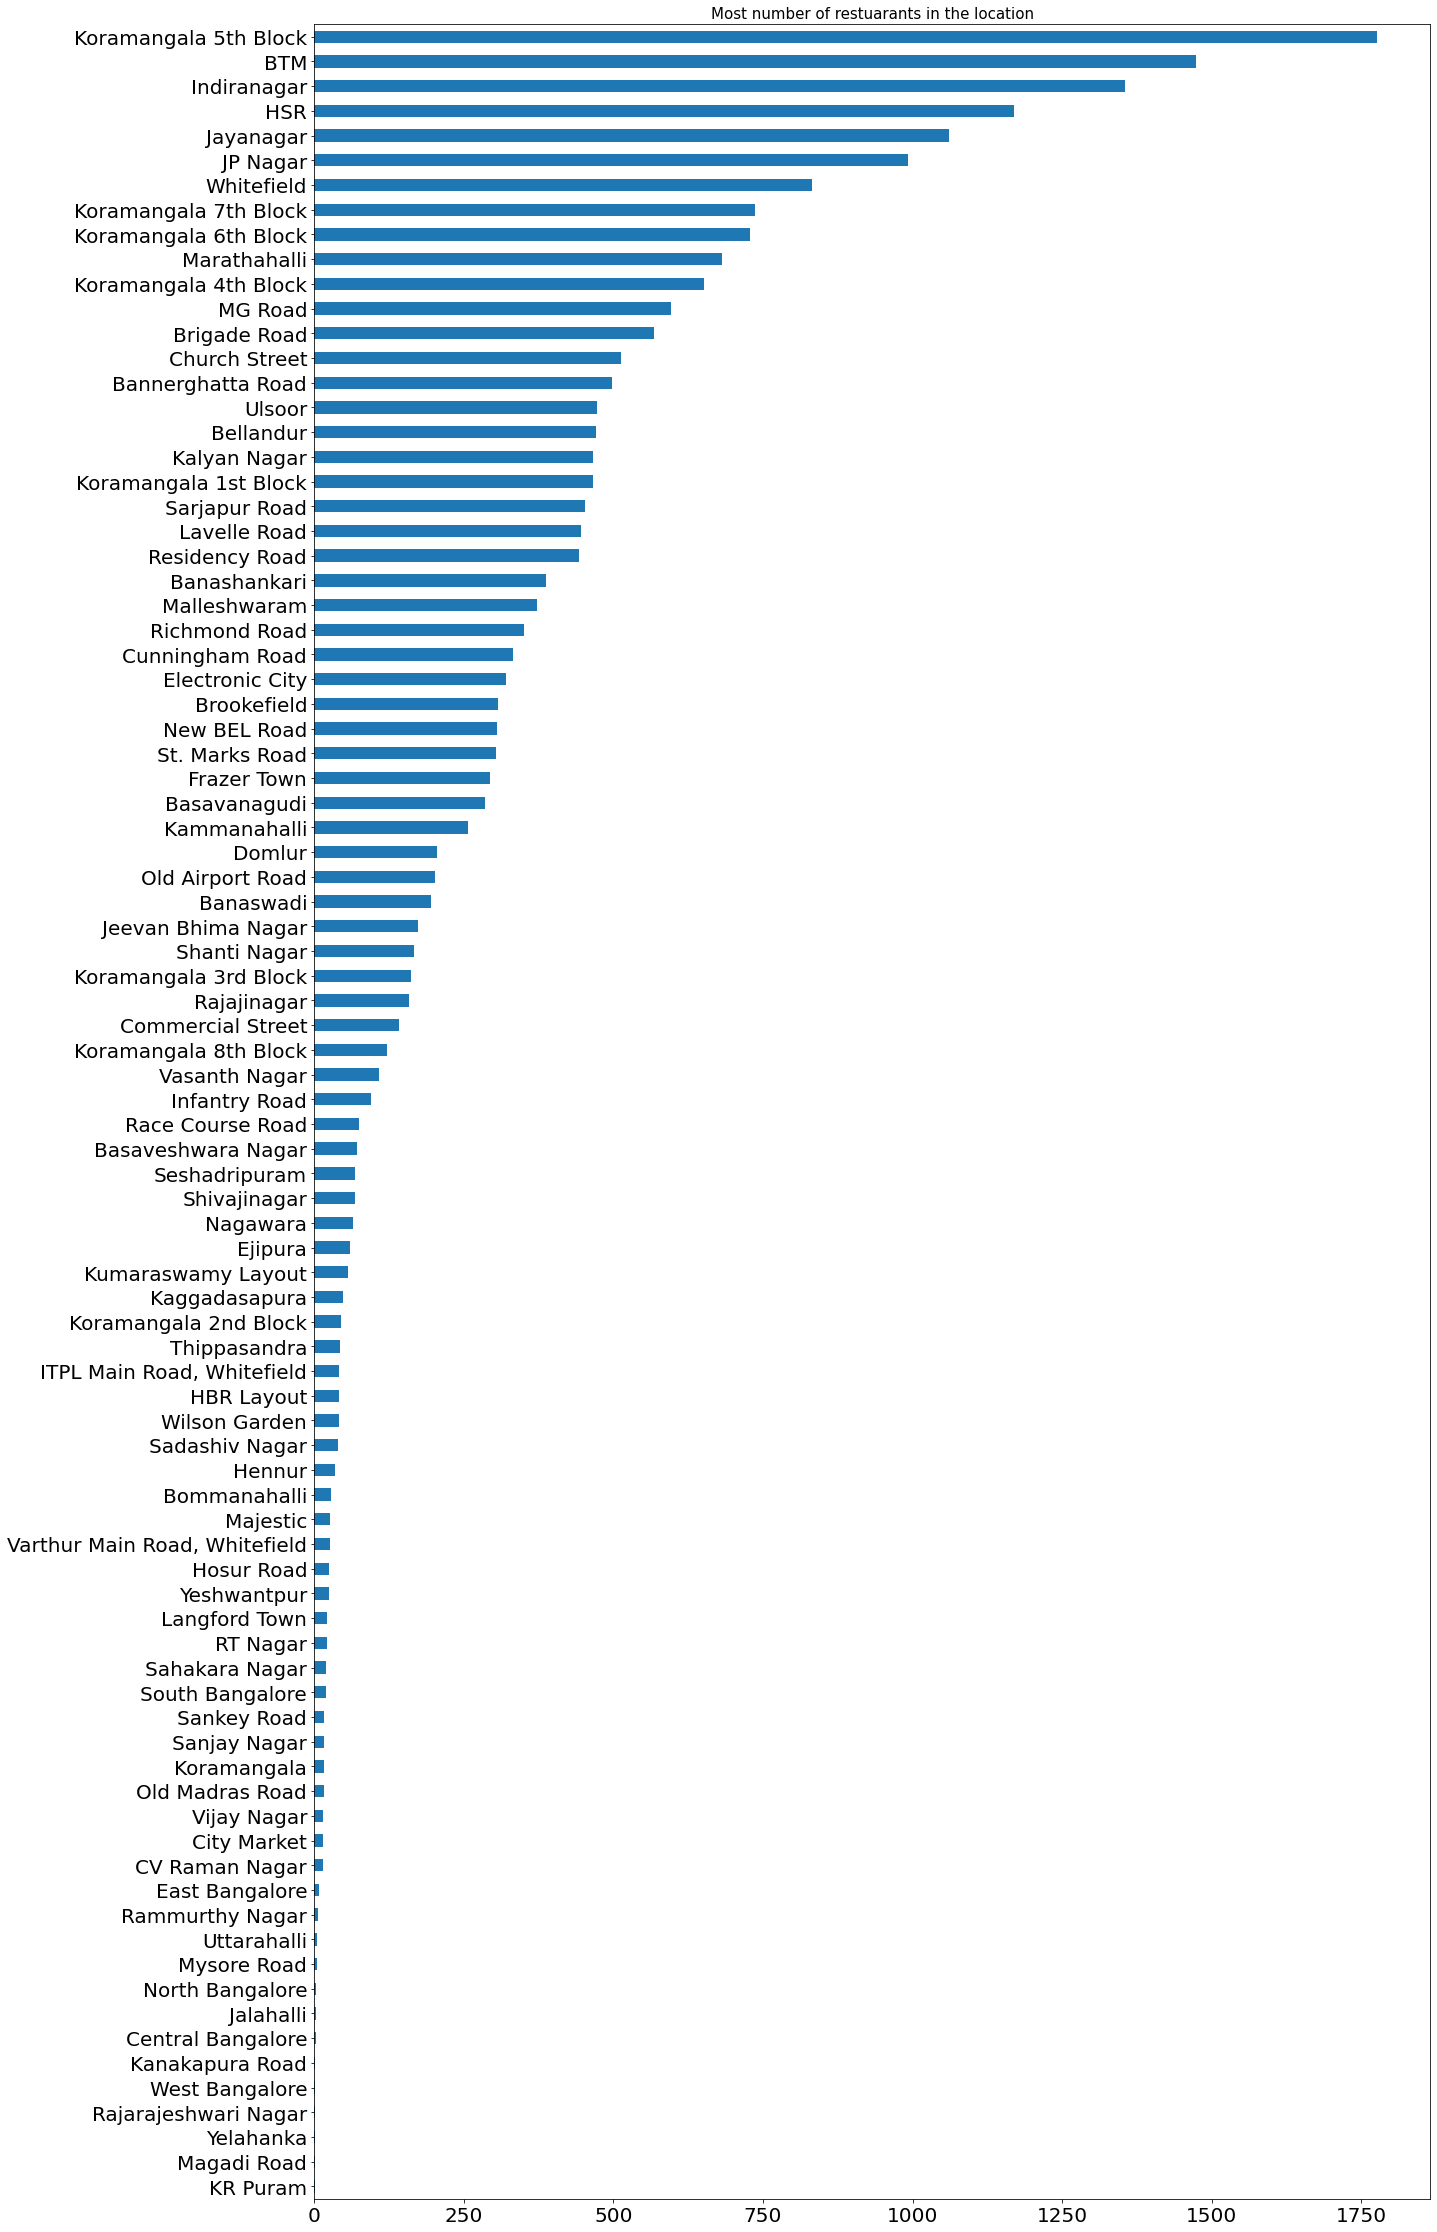

In [168]:
plt.figure(figsize=(20,40))
location_count.plot(kind='barh',fontsize=20)
plt.title('Most number of restuarants in the location', fontsize=15)
plt.show()

### Restaurants based on their Dining Type

In [169]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [170]:
data['listed_in(type)'].value_counts().sort_values(ascending=True)

Pubs and bars           523
Buffet                  754
Drinks & nightlife      879
Cafes                  1066
Desserts               1364
Dine-out               8009
Delivery              10664
Name: listed_in(type), dtype: int64

In [171]:
max(data['listed_in(type)'].value_counts())

10664

In [172]:
min(data['listed_in(type)'].value_counts())

523

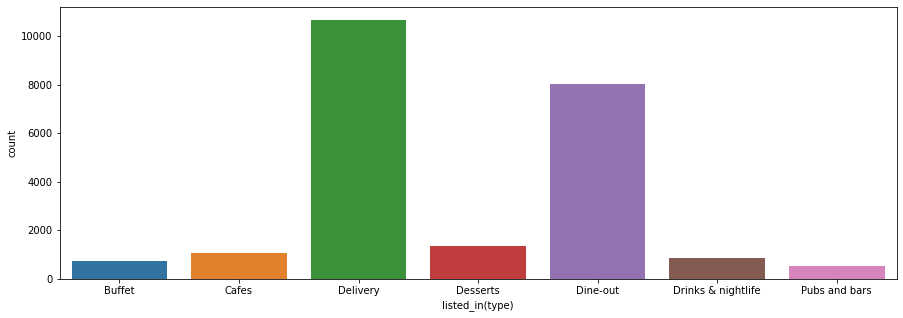

In [173]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['listed_in(type)'])
plt.show()

### Restaurants based on their Subcity Type

In [174]:
subcity = data['listed_in(city)'].value_counts().sort_values(ascending=True)
subcity

New BEL Road              284
Electronic City           320
Banashankari              373
Rajajinagar               378
Malleshwaram              498
Sarjapur Road             503
Bellandur                 507
Kalyan Nagar              518
Kammanahalli              532
Bannerghatta Road         543
Frazer Town               545
Brookefield               600
Basavanagudi              603
Marathahalli              620
Whitefield                632
HSR                       743
Old Airport Road          757
JP Nagar                  817
Residency Road            843
Lavelle Road              896
Brigade Road              969
Church Street             983
MG Road                  1009
Indiranagar              1015
Jayanagar                1058
Koramangala 6th Block    1253
Koramangala 5th Block    1311
Koramangala 4th Block    1348
Koramangala 7th Block    1381
BTM                      1420
Name: listed_in(city), dtype: int64

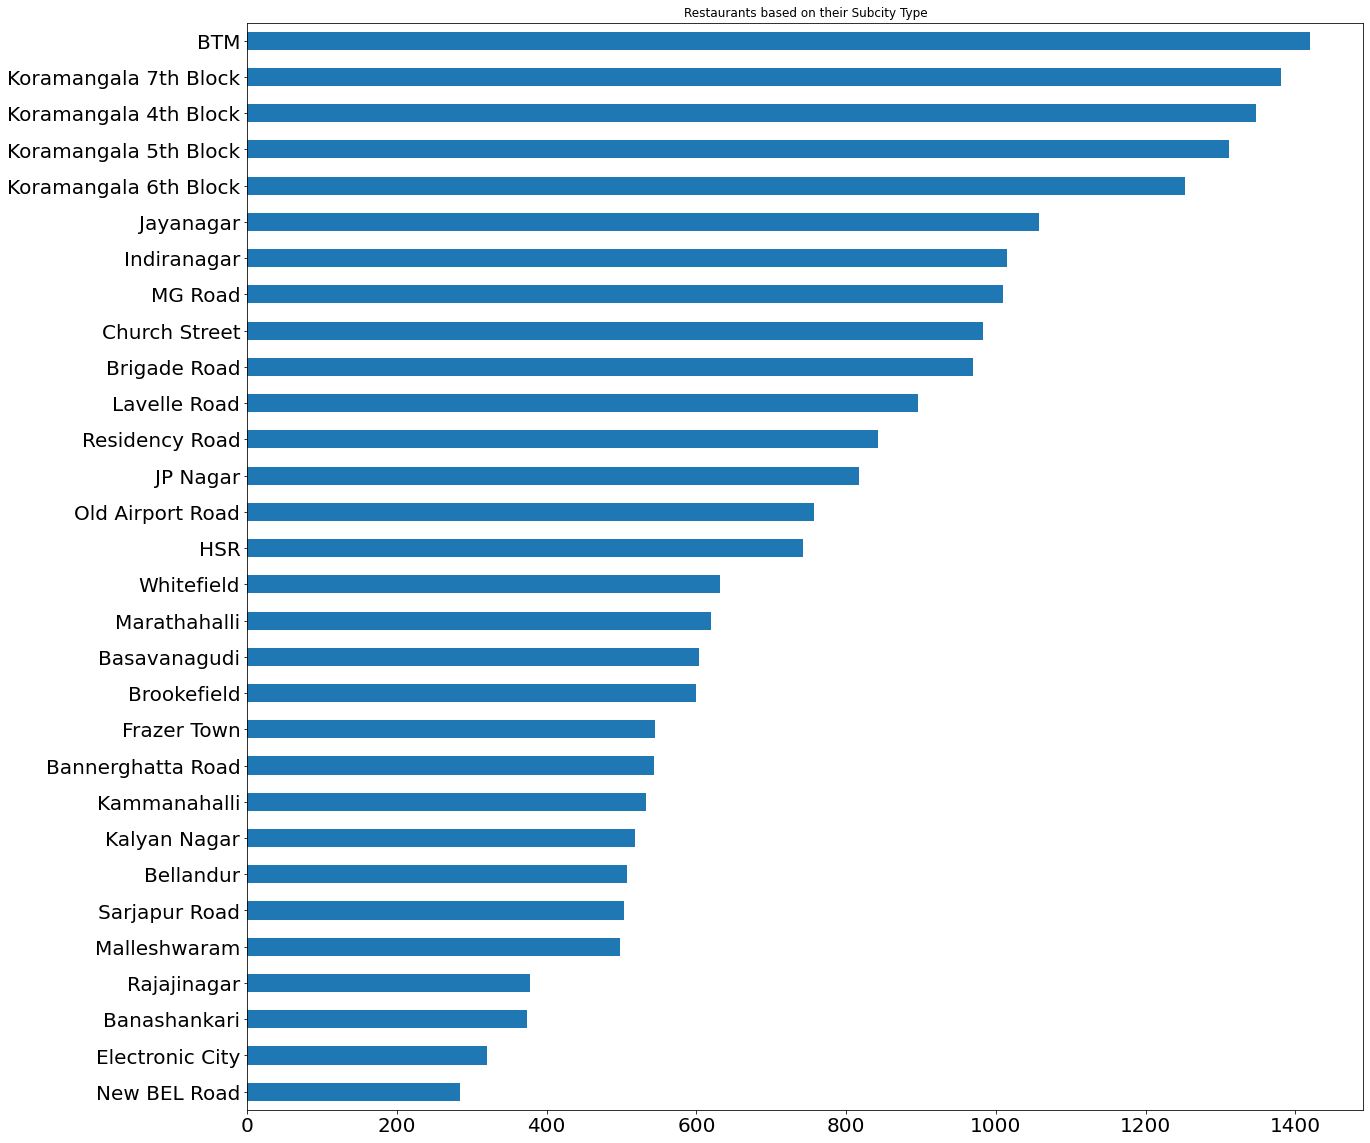

In [175]:
plt.figure(figsize=(20,20))
subcity.plot(kind='barh', fontsize=20)
plt.title('Restaurants based on their Subcity Type')
plt.show()

### Restaurants based on their FoodType

In [176]:
cuisine = set()

for i in data['cuisines']:
    for j in str(i).split(', '):
        cuisine.add(j)
print(cuisine)

{'Bar Food', 'Portuguese', 'Assamese', 'Continental', 'Maharashtrian', 'Lucknowi', 'Momos', 'BBQ', 'European', 'Turkish', 'Kashmiri', 'Ice Cream', 'Konkan', 'French', 'Greek', 'Desserts', 'Seafood', 'Juices', 'Chinese', 'Bakery', 'Indonesian', 'Modern Indian', 'Steak', 'Nepalese', 'Fast Food', 'Healthy Food', 'Lebanese', 'Asian', 'South American', 'Pizza', 'South Indian', 'Italian', 'Burger', 'Singaporean', 'Chettinad', 'Bengali', 'Middle Eastern', 'Russian', 'Biryani', 'Bubble Tea', 'Finger Food', 'North Indian', 'Sushi', 'Belgian', 'Coffee', 'Arabian', 'Japanese', 'Tex-Mex', 'Goan', 'Gujarati', 'Roast Chicken', 'Parsi', 'Vietnamese', 'German', 'Mangalorean', 'Grill', 'Iranian', 'Mediterranean', 'Jewish', 'American', 'Awadhi', 'Salad', 'North Eastern', 'Street Food', 'Kebab', 'Kerala', 'Spanish', 'Thai', 'Beverages', 'Charcoal Chicken', 'Afghan', 'Mithai', 'Bihari', 'Sindhi', 'Naga', 'Hyderabadi', 'Vegan', 'Afghani', 'Sandwich', 'Burmese', 'Andhra', 'Mexican', 'Wraps', 'Tibetan', 'Caf

In [177]:
cuisine

{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Parsi',
 'Pizza',
 'Portuguese',
 'Rajasthani',
 'Roast Chicken',
 'Rolls',
 'Russian',
 'Salad',
 'Sandwi

###  All the North Indian Food Serving Restaurants

In [179]:
data[data['cuisines'].str.contains('North Indian')]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400,"[('Rated 2.0', ""RATED\n We went out to this p...",[],Pubs and bars,Whitefield
51704,Smaaash,No,Yes,4.0,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese",1500,"[('Rated 3.0', 'RATED\n Like this place for z...",[],Pubs and bars,Whitefield
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield


### All the Chinese Food Serving Restaurants

In [180]:
data[data['cuisines'].str.contains('Chinese')]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
16,Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,"[('Rated 1.0', ""RATED\n This place is right o...",[],Cafes,Banashankari
17,Kirthi's Biryani,Yes,No,3.8,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,"[('Rated 3.0', ""RATED\n New place.. though it...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4,1313,Whitefield,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800,"[('Rated 3.0', 'RATED\n Wanted to try this pl...",[],Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400,"[('Rated 2.0', ""RATED\n We went out to this p...",[],Pubs and bars,Whitefield
51704,Smaaash,No,Yes,4.0,189,Whitefield,"Casual Dining, Pub","Pizza, Beer","North Indian, Pizza, Chinese",1500,"[('Rated 3.0', 'RATED\n Like this place for z...",[],Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield


### Restaurant Dinning type

In [191]:
data['rest_type'].value_counts().sort_values(ascending=True)

Food Court, Casual Dining       1
Dhaba                           1
Dessert Parlor, Kiosk           2
Club, Casual Dining             4
Bar, Pub                        5
                             ... 
Casual Dining, Bar            985
Dessert Parlor               1083
Cafe                         2375
Quick Bites                  5253
Casual Dining                7331
Name: rest_type, Length: 73, dtype: int64